### cnn model test
- haha

In [1]:
import cnn_multi_class_func as cnn

import torch
from torch.utils.data import DataLoader

In [2]:
vgg_model = cnn.VGG16Model()

In [3]:
vgg16_model = torch.load('./model/gvv16_model_epoch100.pth', weights_only=False, map_location=torch.device('cpu'))

In [4]:
train_dataset, test_dataset, val_dataset = cnn.make_dataset_cpu()

In [5]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

In [6]:
test_dataset[0]

(tensor([[[0.4431, 0.4510, 0.4039,  ..., 0.5529, 0.5529, 0.5922],
          [0.4039, 0.3725, 0.3804,  ..., 0.5216, 0.5059, 0.5137],
          [0.4039, 0.3490, 0.4196,  ..., 0.4824, 0.4667, 0.4824],
          ...,
          [0.6157, 0.6000, 0.5843,  ..., 0.7725, 0.7725, 0.7961],
          [0.6392, 0.6235, 0.6157,  ..., 0.7961, 0.7961, 0.8196],
          [0.6706, 0.6549, 0.6471,  ..., 0.8353, 0.8431, 0.8667]],
 
         [[0.4510, 0.4588, 0.4118,  ..., 0.5608, 0.5608, 0.6000],
          [0.4118, 0.3804, 0.3882,  ..., 0.5294, 0.5137, 0.5216],
          [0.4118, 0.3569, 0.4275,  ..., 0.4902, 0.4745, 0.4902],
          ...,
          [0.6235, 0.6078, 0.5922,  ..., 0.7804, 0.7804, 0.8039],
          [0.6471, 0.6314, 0.6235,  ..., 0.8039, 0.8039, 0.8275],
          [0.6784, 0.6627, 0.6549,  ..., 0.8431, 0.8510, 0.8745]],
 
         [[0.4902, 0.4980, 0.4510,  ..., 0.6000, 0.6000, 0.6392],
          [0.4510, 0.4196, 0.4275,  ..., 0.5686, 0.5529, 0.5608],
          [0.4510, 0.3961, 0.4667,  ...,

In [7]:
dct_dataset = cnn.DctDataset()

In [8]:
test = DataLoader(dct_dataset.test_datasets[0], batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

In [9]:
# test_loader에서 특정 인덱스의 배치를 가져오는 함수
def get_batch(loader, index):
    # DataLoader의 Iterator를 초기화
    iterator = iter(loader)
    
    # index에 해당하는 배치를 가져오기
    for _ in range(index + 1):
        batch = next(iterator)
    return batch

In [10]:
test_loader = DataLoader(dct_dataset.test_datasets, batch_size=1, shuffle=False)

# 전체 배치 수 확인
num_batches = len(test_loader)
print(f"Total number of batches: {num_batches}")

# 원하는 배치 인덱스 설정
desired_batch_index = 350

# 인덱스가 범위 내에 있는지 확인
if desired_batch_index < num_batches:
    first_batch = get_batch(test_loader, desired_batch_index)
    labelDict = {0:'dog', 1:'horse', 2: 'elephant', 3:'butterfly', 4:'chicken',
                 5:'cat', 6:'cow', 7:'sheep', 8:'spider', 9:'squirrel'}

    result = cnn.predict(vgg16_model, [first_batch])  # 배치를 리스트로 감싸서 전달
else:
    print(f"Batch index {desired_batch_index} is out of range.")


labelDict = {0:'dog', 1:'horse', 2: 'elephant', 3:'butterfly', 4:'chiken',
                        5:'cat', 6:'cat', 7:'sheep', 8:'spider', 9:'squirrel'}

result = cnn.predict(vgg16_model, [first_batch])  # 배치를 리스트로 감싸서 전달


Total number of batches: 5236
<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [11]:
print(f"predict label: {result[0]}, real label: {labelDict[int(result[1][0])]}")

predict label: ['spider'], real label: spider


In [12]:
import matplotlib.pyplot as plt

def show_predictions(images, predictions, actuals, num_images=5):
    """
    Display images with their predicted and actual labels.

    Args:
        images (tensor): Images to display.
        predictions (list): Predicted labels.
        actuals (list): Actual labels.
        num_images (int): Number of images to display.
    """
    plt.figure(figsize=(15, 5))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu())  # 이미지 텐서를 (H, W, C) 형태로 변환
        plt.title(f'Pred: {predictions[i]}\nActual: {actuals}', color=("green" if predictions[i]==actuals else 'red'))
        plt.axis('off')
    
    plt.show()



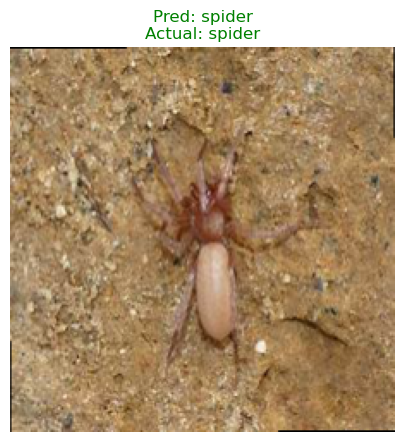

In [13]:
# 예측 결과 및 이미지를 가져오기
predictions, actuals = result
actuals = labelDict[int(actuals[0])]

# test_loader에서 이미지를 가져오기
images, _ = first_batch  # 첫 번째 배치 가져오기

# # normalize
# image_min = images.min()
# image_max = images.max()
# images.clamp_(min=image_min, max=image_max)
# images.add_(-image_min).div_(image_max-image_min+1e-5)

# 이미지 텐서에서 첫 번째 이미지를 90도 회전
rotated_images = torch.rot90(images, k=4, dims=[2, 3])  # k는 회전 횟수 (1 = 90도)

# 정규화 코드
image_min = rotated_images.min()
image_max = rotated_images.max()
rotated_images.clamp_(min=image_min, max=image_max)
rotated_images.add_(-image_min).div_(image_max - image_min + 1e-5)

# 예측 시각화
show_predictions(rotated_images, predictions, actuals, num_images=1)


In [15]:
def predict_web(model, image_tensor):
    """
    classification animal for a single image

    Args:
        model (model_instance):  testing model
        image_tensor (tensor): transformed single image tensor

    Returns:
        str: predicted animal species
    """
    
    model.eval()  # Set the model to evaluation mode
    with torch.inference_mode():  # Ensure no gradients are computed
        # image_tensor = image_tensor.to(DEVICE, dtype=torch.float32)  # 단일 이미지 텐서로 처리
        outputs = model(image_tensor)  # 모델에 이미지 입력
        _, predicted = torch.max(outputs, 1)  # 최대 값의 인덱스를 예측값으로
        
        labelDict = {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 4: 'gallina',
                     5: 'gatto', 6: 'mucca', 7: 'pecora', 8: 'ragno', 9: 'scoiattolo'}
        translate = {'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken',
                     'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'ragno': 'spider', 'scoiattolo': 'squirrel'}
        
        predicted_label = predicted.cpu().numpy()[0]  # 예측된 라벨 인덱스 추출
        predicted_animal = translate[labelDict[predicted_label]]  # 인덱스를 통해 동물 이름 변환
    
    return predicted_animal

In [16]:
from torchvision import transforms
from PIL import Image
import torch

In [47]:
# path = r'C:\Users\PC\Desktop\AI_KDT6\KDT6\mini-project\DeepLearning\data\gallina\1000.jpeg'
path = './data/gallina/2.jpeg'

In [48]:
img_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
        ])


# 단일 이미지 파일 처리
image_pil = Image.open(path)
# image_transformed = img_transforms(image_pil).unsqueeze(0)  # 배치 차원 추가
image_transformed = img_transforms(image_pil).unsqueeze(0)

image_transformed.ndim

4

In [49]:
l_l = cnn.predict_web(vgg16_model, image_transformed)
print(l_l)

spider
